# Basic examples

In [44]:
import pycellid as ld
import pandas as pd
import os
import matplotlib.pyplot as plt

## CellData object instantiation
A CellData object can be instantiated by declaring the parameters:
+ path: directory that contains the images segmented by Cell-ID.
+ df: a Dataframe containing the variables measured for each cell.

The data used in the following example can be downloaded from the 'samples_cellid' folder of the [PycellID](https://github.com/pyCellID/pyCellID) repository.

In [45]:
base_dir = os.path.join(".","samples_cellid")
data_dir = os.path.join(base_dir,"pydata","df.csv")
data = pd.read_csv(data_dir)

In [46]:
cells = ld.CellData(path=base_dir,df=data)

## Inspection of data structure
Information about the way the data is structured can be obtained through intuitive commands.

+ Number of rows times number of columns of the table containing Cell-ID data

In [47]:
cells.size

2255436

+ Number of rows and columns of the table

In [48]:
cells.shape

(18189, 124)

+ List of the first 15 parameters of data table

In [49]:
cells.columns[0:15].to_list()

['pos',
 't_frame',
 'ucid',
 'cellID',
 'time',
 'xpos',
 'ypos',
 'a_tot',
 'num_pix',
 'fft_stat',
 'perim',
 'maj_axis',
 'min_axis',
 'a_nucl',
 'rot_vol']

+ Description of the statistics of parameters

In [50]:
cells["maj_axis"].describe()

count    18189.000000
mean        28.362692
std         10.433144
min          3.343855
25%         20.955810
50%         25.280250
75%         34.729460
max         92.609380
Name: maj_axis, dtype: float64

## Filtering data
You would want to look at your images to rule out out-of-focus cells, find dead cells, or remove those cells that biology tells you to be outliers.

It is posible to present exploratory plots with randomly chosen cells satisfying certain criteria.

<AxesSubplot:>

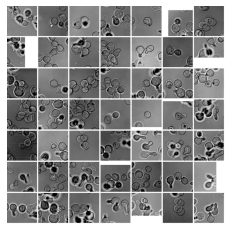

In [51]:
# Exploratory plot presenting n = 49 randomly chosen cells with an area smaller than 500 pixels.
# Out of focus cells, dead cells, clusters and other defects can be seen among the images displayed.
cells.plot(array_img_kws={"channel":"tfp", "n":49, "criteria":{"a_tot":[0, 500]}})

Data can also be presented using histograms and other types of plots.

<AxesSubplot:>

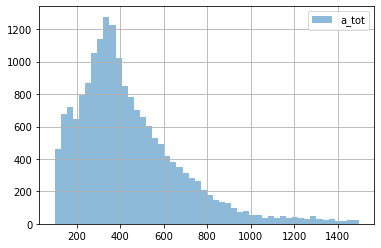

In [52]:
# Histogram of cells in the experiment based on their total area.
cells.a_tot.hist(bins=50, alpha=0.5, legend=True)

Data can be filtered applying thresholds to the measured parameters.
In this case we want to differentiate cells with areas gretar and smaller than 200 pixels and show examples of them in two plots.

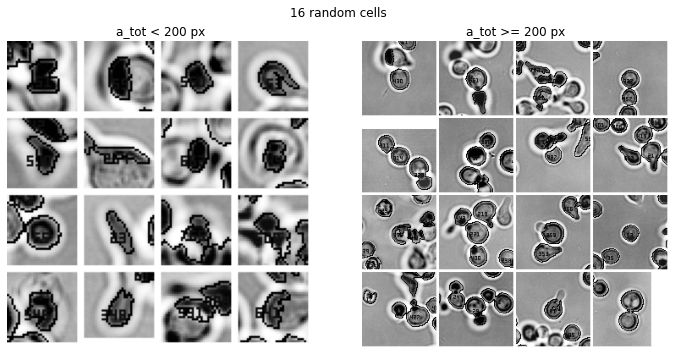

In [53]:
# initialize your figure
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

# Filtering your data
cells[cells["a_tot"]<200].plot(ax=axs[0])
cells[cells["a_tot"]>=200].plot(ax=axs[1])

# titles
plt.suptitle('16 random cells')
axs[0].set_title('a_tot < 200 px')
axs[1].set_title('a_tot >= 200 px')

# customize your output
fig.tight_layout()

## CellsPloter
PyCellID owns the CellsPloter accessor, in charge of rendering the images.
You can use the axes provided by CellPloter with the library of your choice.

CellPloter defines two useful methods:
+ cells_image
+ cimage

*cells_image* method allows the user to plot a custom number of cells.

<AxesSubplot:>

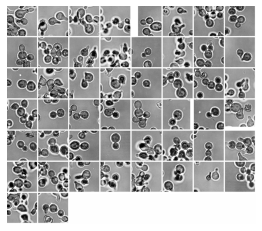

In [54]:
ploter.cells_image({"n":50})

In [55]:
# Defining the accessor
ploter = ld.CellsPloter(cells)

It also let the user to define filtering criteria.

<AxesSubplot:>

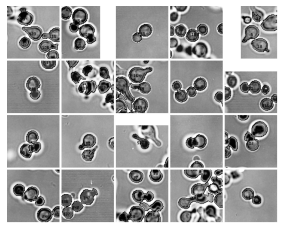

In [56]:
ploter.cells_image({"n":20,"criteria":{"maj_axis":[30,40]}})

<AxesSubplot:>

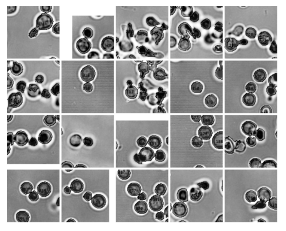

In [57]:
ploter.cells_image({"n":20,"criteria":{"maj_axis":[10,20]}})

Data filtering performed in the previous section can be also carried out using method *cells_image* from CellsPloter.

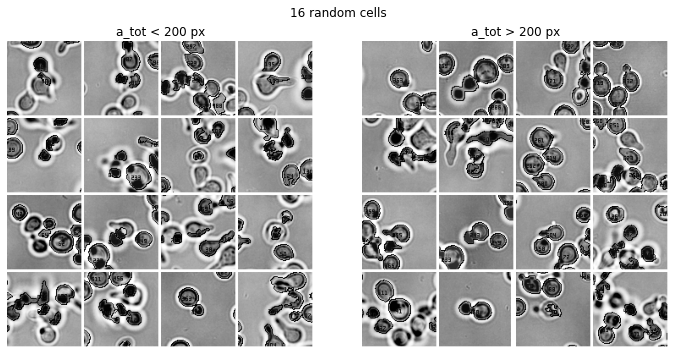

In [58]:
# initialize your figure
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

a_max = cells['a_tot'].max()

# Filtering your data
ploter.cells_image(array_img_kws={'n':16,'criteria':{'a_tot':[0.0,150]}},ax=axs[0])
ploter.cells_image(array_img_kws={'n':16,'criteria':{'a_tot':[150,a_max]}},ax=axs[1])

# titles
plt.suptitle('16 random cells')
axs[0].set_title('a_tot < 200 px')
axs[1].set_title('a_tot > 200 px')

# customize your output
fig.tight_layout()

On the other hand, *cimage* method is used to plot a single cell in a fluorescence channel based on its unique cell identifier (ucid) and the time stamp (t_frame) corresponding to the instant of interest.

<AxesSubplot:>

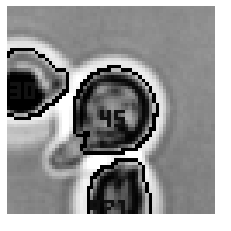

In [59]:
indentifier = { "channel":"BF", "ucid":100000000045, "t_frame":5}
box_img_kws = {"radius":30}
ploter.cimage( indentifier,box_img_kws = box_img_kws)

It can be used to show the time evolution of an individual cell.
As an example, a single cell is presented at different times in TFP and CFP channels.

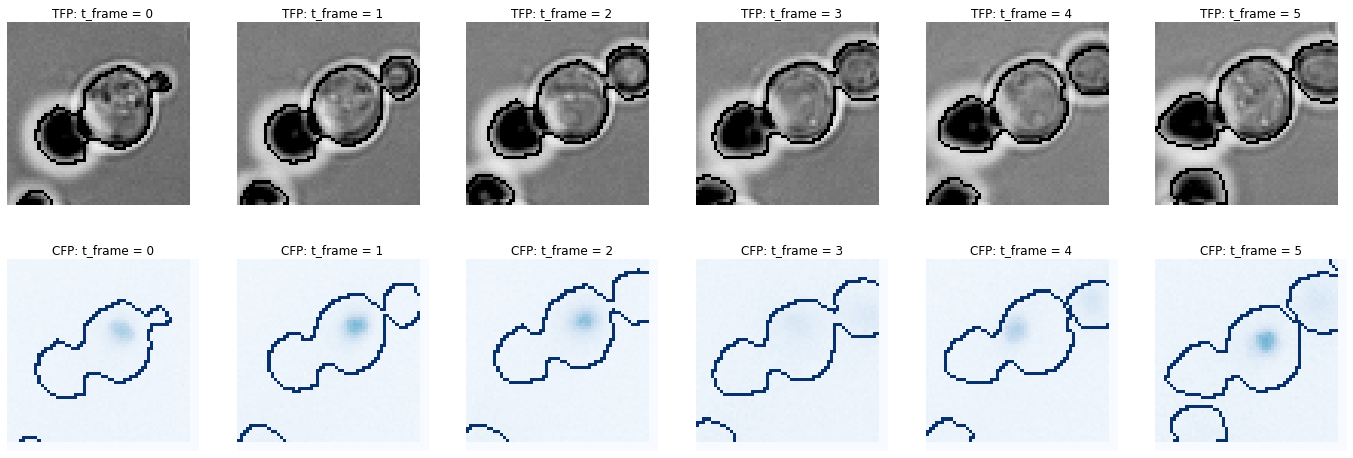

In [60]:
ucid = 100000000047
box_img_kws = {"radius":30}

# initialize your figure
fig, axs = plt.subplots(2, 6)
fig.set_size_inches(24, 8)

channels = ["TFP", "CFP"]
cmaps = ["Greys", "Blues"]

for j, c in enumerate(channels):
    imshow_kws = None
    imshow_kws = {"cmap": cmaps[j]}
    for i in range(6):
        indentifier = { "channel":c, "ucid":ucid, "t_frame":i}
        ploter.cimage( indentifier, box_img_kws = box_img_kws, imshow_kws=imshow_kws, ax=axs[j,i])
        titles = f'{c}: t_frame = {i}'
        axs[j,i].set_title(titles)